![rmotr](https://i.imgur.com/jiPp4hj.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39117599-a2ca6a88-46e7-11e8-9eb1-e3321aec3f49.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# More Visualizations

Previously, we saw an overview of how pandas `plot` method worked and how to use the basic API of matplotlib. We'll provide more details in this lesson.

![separator2](https://i.imgur.com/4gX5WFr.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Global API

Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

In [2]:
x = np.arange(-10, 11)

[&lt;matplotlib.lines.Line2D at 0x7fa2cbf32910&gt;]

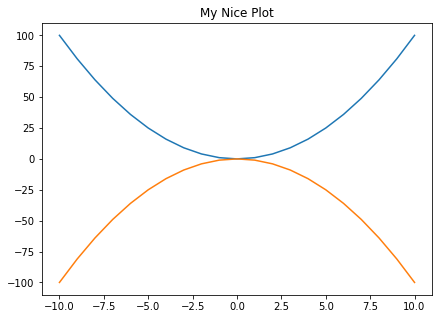

In [4]:
plt.figure(figsize=(7, 5))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


Text(0, 0.5, &#39;X Squared&#39;)

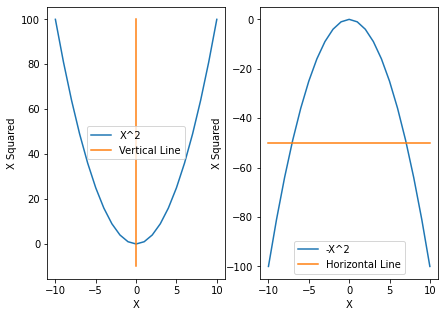

In [7]:
plt.figure(figsize=(7, 5))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

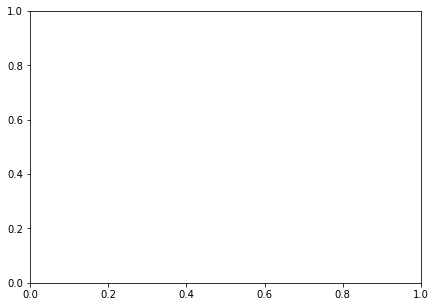

In [8]:
fig, axes = plt.subplots(figsize=(7, 5))

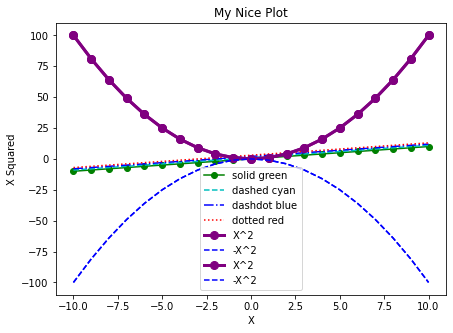

In [24]:
axes.plot(
    x, (x ** 2), color='purple', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()
fig

Text(0.5, 1.0, &#39;My Nice Plot&#39;)

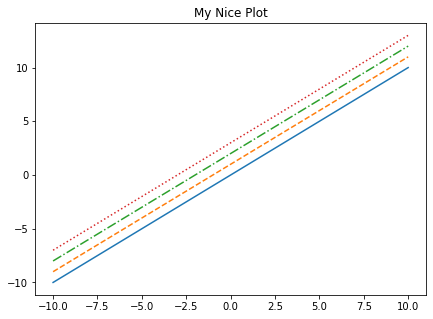

In [21]:
fig, axes = plt.subplots(figsize=(7, 5))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

&lt;matplotlib.legend.Legend at 0x7fa2c8b45fa0&gt;

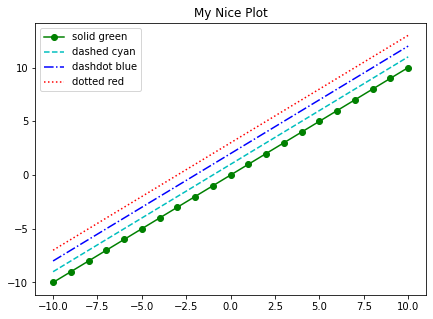

In [25]:
fig, axes = plt.subplots(figsize=(7, 5))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [26]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: [&#39;.&#39;, &#39;,&#39;, &#39;o&#39;, &#39;v&#39;, &#39;^&#39;, &#39;&lt;&#39;, &#39;&gt;&#39;, &#39;1&#39;, &#39;2&#39;, &#39;3&#39;, &#39;4&#39;, &#39;8&#39;, &#39;s&#39;, &#39;p&#39;, &#39;*&#39;, &#39;h&#39;, &#39;H&#39;, &#39;+&#39;, &#39;x&#39;, &#39;D&#39;, &#39;d&#39;, &#39;|&#39;, &#39;_&#39;, &#39;P&#39;, &#39;X&#39;, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, &#39;None&#39;, None, &#39; &#39;, &#39;&#39;]


In [27]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: [&#39;_&#39;, &#39;-&#39;, &#39;--&#39;, &#39;:&#39;]


![separator1](https://i.imgur.com/ZUWYTii.png)

## Other types of plots

### Figures and subfigures

When we call the `subplots()` function we get a tuple containing a `Figure` and a `axes` element.

(&lt;Figure size 432x288 with 1 Axes&gt;, &lt;AxesSubplot:&gt;)

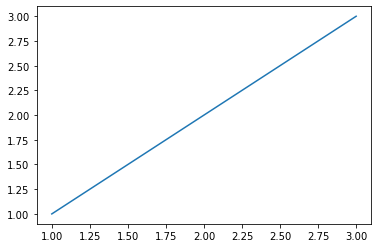

In [28]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

(&lt;Figure size 1008x432 with 4 Axes&gt;,
 array([[&lt;AxesSubplot:&gt;, &lt;AxesSubplot:&gt;],
        [&lt;AxesSubplot:&gt;, &lt;AxesSubplot:&gt;]], dtype=object))

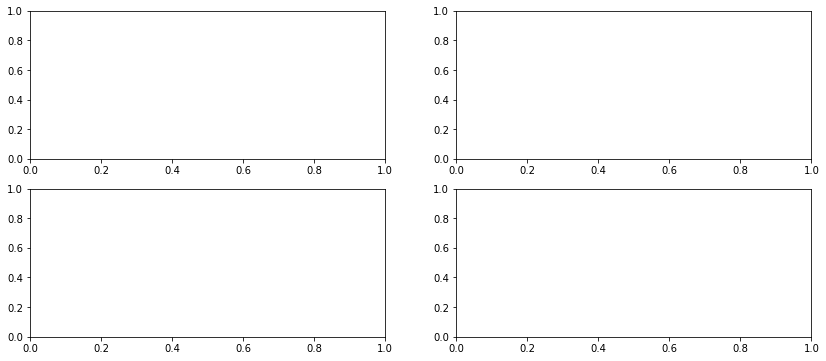

In [29]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

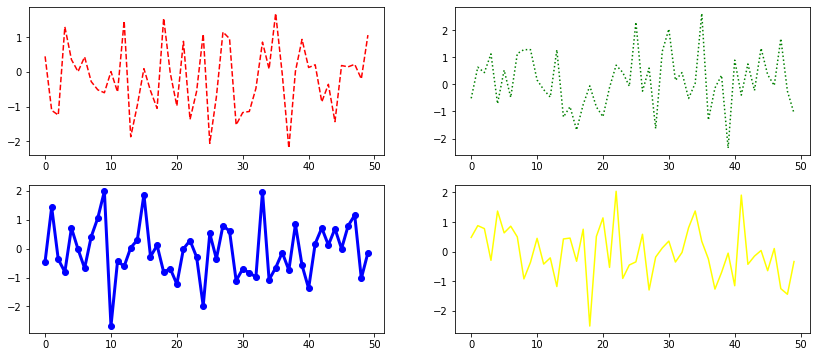

In [30]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

#### The `subplot2grid` command

There is another way to make subplots using a grid-like format:

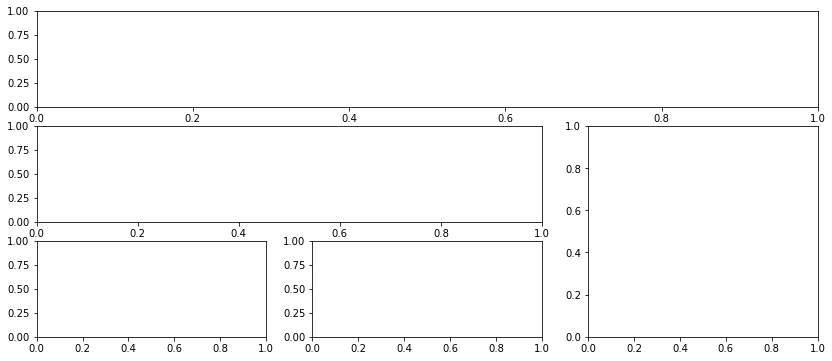

In [31]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter Plot

In [32]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

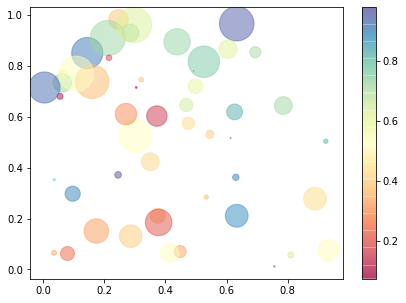

In [33]:
plt.figure(figsize=(7, 5))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

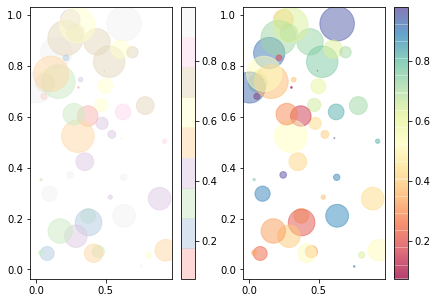

In [39]:
fig = plt.figure(figsize=(7, 5))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

Here is the full `cmap` options available: https://matplotlib.org/users/colormaps.html

### Histograms

In [40]:
values = np.random.randn(1000)

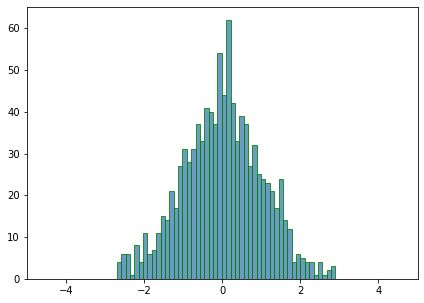

In [42]:
plt.subplots(figsize=(7, 5))

plt.hist(values, bins=50, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [19]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [43]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

&lt;scipy.stats.kde.gaussian_kde at 0x7fa2c83a7ac0&gt;

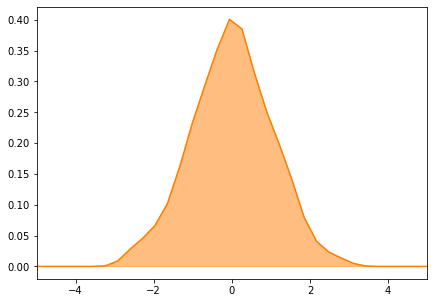

In [47]:
plt.subplots(figsize=(7, 5))

values2 = np.linspace(min(values)-5, max(values)+5, 50)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

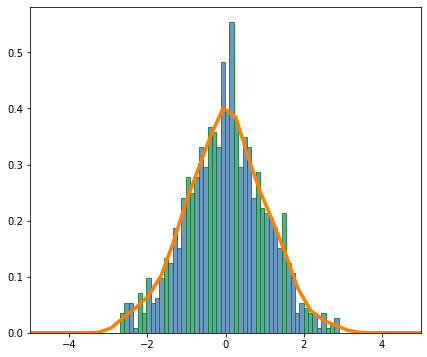

In [50]:
plt.subplots(figsize=(7, 6))

plt.hist(values, bins=50, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.5)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots

In [51]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

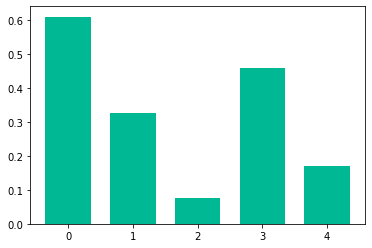

In [56]:
plt.figure(figsize=(6, 4))

barWidth = 0.7
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

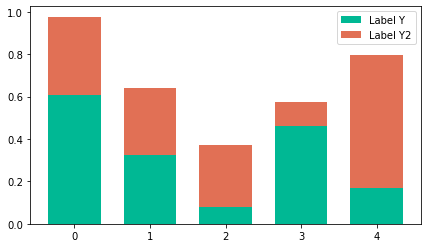

In [57]:
plt.figure(figsize=(7, 4))

barWidth = 0.7
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [58]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 4., 6., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 &lt;BarContainer object of 10 artists&gt;)

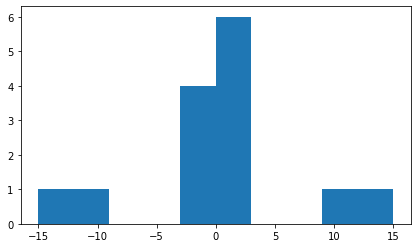

In [59]:
plt.figure(figsize=(7, 4))

plt.hist(values)

{&#39;whiskers&#39;: [&lt;matplotlib.lines.Line2D at 0x7fa2c2412af0&gt;,
  &lt;matplotlib.lines.Line2D at 0x7fa2c2412e50&gt;],
 &#39;caps&#39;: [&lt;matplotlib.lines.Line2D at 0x7fa2c24161f0&gt;,
  &lt;matplotlib.lines.Line2D at 0x7fa2c2416550&gt;],
 &#39;boxes&#39;: [&lt;matplotlib.lines.Line2D at 0x7fa2c2412790&gt;],
 &#39;medians&#39;: [&lt;matplotlib.lines.Line2D at 0x7fa2c24168e0&gt;],
 &#39;fliers&#39;: [&lt;matplotlib.lines.Line2D at 0x7fa2c2416c40&gt;],
 &#39;means&#39;: []}

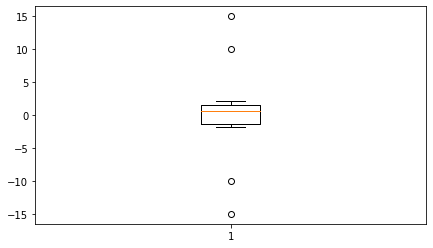

In [60]:
plt.figure(figsize=(7, 4))

plt.boxplot(values)

![separator2](https://i.imgur.com/4gX5WFr.png)